# Mouting drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading data

In [2]:
# prompt: reading excel sheet

import pandas as pd
import numpy as np

# Read an Excel file
df = pd.read_excel('/content/drive/MyDrive/galton_height_dataset.xlsx')
df_original = df

# Print the DataFrame
print(df)


    family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4     1       0
1        1    78.5    67.0      F    69.2     4     0       1
2        1    78.5    67.0      F    69.0     4     0       1
3        1    78.5    67.0      F    69.0     4     0       1
4        2    75.5    66.5      M    73.5     4     1       0
..     ...     ...     ...    ...     ...   ...   ...     ...
893   136A    68.5    65.0      M    68.5     8     1       0
894   136A    68.5    65.0      M    67.7     8     1       0
895   136A    68.5    65.0      F    64.0     8     0       1
896   136A    68.5    65.0      F    63.5     8     0       1
897   136A    68.5    65.0      F    63.0     8     0       1

[898 rows x 8 columns]


# **Data Preprocessing**

# removing rows having different datatype

In [4]:

# Select rows where the 'FAMILY' column is not of type int
df = df[df['family'].apply(lambda x: isinstance(x, int))]

# Print the DataFrame
print(df)


    family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4     1       0
1        1    78.5    67.0      F    69.2     4     0       1
2        1    78.5    67.0      F    69.0     4     0       1
3        1    78.5    67.0      F    69.0     4     0       1
4        2    75.5    66.5      M    73.5     4     1       0
..     ...     ...     ...    ...     ...   ...   ...     ...
885    203    62.0    66.0      M    64.0     3     1       0
886    203    62.0    66.0      F    62.0     3     0       1
887    203    62.0    66.0      F    61.0     3     0       1
888    204    62.5    63.0      M    66.5     2     1       0
889    204    62.5    63.0      F    57.0     2     0       1

[890 rows x 8 columns]


# removing null values

In [5]:
# prompt: generate code to remove null values

df = df.dropna()
print(df)

    family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4     1       0
1        1    78.5    67.0      F    69.2     4     0       1
2        1    78.5    67.0      F    69.0     4     0       1
3        1    78.5    67.0      F    69.0     4     0       1
4        2    75.5    66.5      M    73.5     4     1       0
..     ...     ...     ...    ...     ...   ...   ...     ...
885    203    62.0    66.0      M    64.0     3     1       0
886    203    62.0    66.0      F    62.0     3     0       1
887    203    62.0    66.0      F    61.0     3     0       1
888    204    62.5    63.0      M    66.5     2     1       0
889    204    62.5    63.0      F    57.0     2     0       1

[890 rows x 8 columns]


# data formating for 'gender'

In [6]:
gender_map = {'M': 1, 'F': 0}
df['gender'] = df['gender'].map(gender_map)
df_original = df


In [7]:
df.head()

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,1,73.2,4,1,0
1,1,78.5,67.0,0,69.2,4,0,1
2,1,78.5,67.0,0,69.0,4,0,1
3,1,78.5,67.0,0,69.0,4,0,1
4,2,75.5,66.5,1,73.5,4,1,0


# adding additional featue "avg_parent_height"

In [8]:
# Feature engineering: create average parental height
df['avg_parent_height'] = (df['father'] + df['mother']) / 2
print(df)

    family  father  mother  gender  height  kids  male  female  \
0        1    78.5    67.0       1    73.2     4     1       0   
1        1    78.5    67.0       0    69.2     4     0       1   
2        1    78.5    67.0       0    69.0     4     0       1   
3        1    78.5    67.0       0    69.0     4     0       1   
4        2    75.5    66.5       1    73.5     4     1       0   
..     ...     ...     ...     ...     ...   ...   ...     ...   
885    203    62.0    66.0       1    64.0     3     1       0   
886    203    62.0    66.0       0    62.0     3     0       1   
887    203    62.0    66.0       0    61.0     3     0       1   
888    204    62.5    63.0       1    66.5     2     1       0   
889    204    62.5    63.0       0    57.0     2     0       1   

     avg_parent_height  
0                72.75  
1                72.75  
2                72.75  
3                72.75  
4                71.00  
..                 ...  
885              64.00  
886    

# columns present in the dataframe and checking null values

In [9]:
# prompt: generate code to show what are the columns present in the df

# Print the column names of the DataFrame
print(df.columns)


Index(['family', 'father', 'mother', 'gender', 'height', 'kids', 'male',
       'female', 'avg_parent_height'],
      dtype='object')


In [10]:
# prompt: genearate code to know any null values present in the dataframe or not

null_values = df.isnull().sum()
print(null_values)

family               0
father               0
mother               0
gender               0
height               0
kids                 0
male                 0
female               0
avg_parent_height    0
dtype: int64


# **Data Visualisation**

# Distribution of children's height relative to father's height

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(data_frame = df, x="father", y="height", size ="kids", color = "gender", trendline="ols")
figure.show()


# Distribution of children's height relative to mother's height

In [12]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(data_frame = df, x="mother", y="height", size ="kids", color = "gender", trendline="ols")
figure.show()


# distribution of son's height relative to mother's height

In [13]:
# prompt: distribution od son's height relative to mother's height

figure = px.scatter(data_frame = df[df['gender'] == 1], x="mother", y="height", size ="kids", color_discrete_sequence=["yellow"], trendline="ols")
# Manually change the trendline color
for trace in figure.data:
    if trace.mode == 'lines':  # This is the trendline trace
        trace.line.color = 'red'  # Change this to the color you prefer
figure.show()


# distribution od daughter's height relative to mother's height

In [14]:
# prompt: distribution od daughter's height relative to mother's height

figure = px.scatter(data_frame = df[df['gender'] == 0], x="mother", y="height", size ="kids", color_discrete_sequence=["blue"], trendline="ols")
# Manually change the trendline color
for trace in figure.data:
    if trace.mode == 'lines':  # This is the trendline trace
        trace.line.color = 'red'  # Change this to the color you prefer
figure.show()


# distribution of son's height relative to father's height

In [15]:
# prompt: distribution of son's height relative to father's height

figure = px.scatter(data_frame = df[df['gender'] == 1], x="father", y="height", size ="kids", color_discrete_sequence=["yellow"], trendline="ols")
# Manually change the trendline color
for trace in figure.data:
    if trace.mode == 'lines':  # This is the trendline trace
        trace.line.color = 'red'  # Change this to the color you prefer
figure.show()


# distribution of daughter's height relative to father's height

In [16]:
# prompt: distribution of daughter's height relative to father's height

figure = px.scatter(data_frame = df[df['gender'] == 0], x="father", y="height", size ="kids", color_discrete_sequence=["blue"], trendline="ols")
# Manually change the trendline color
for trace in figure.data:
    if trace.mode == 'lines':  # This is the trendline trace
        trace.line.color = 'red'  # Change this to the color you prefer
figure.show()


# **Correlation coefficients before removing outliers**

# Correlation coefficients of child's height

height               1.000000
avg_parent_height    0.328179
father               0.276801
mother               0.202039
Name: height, dtype: float64


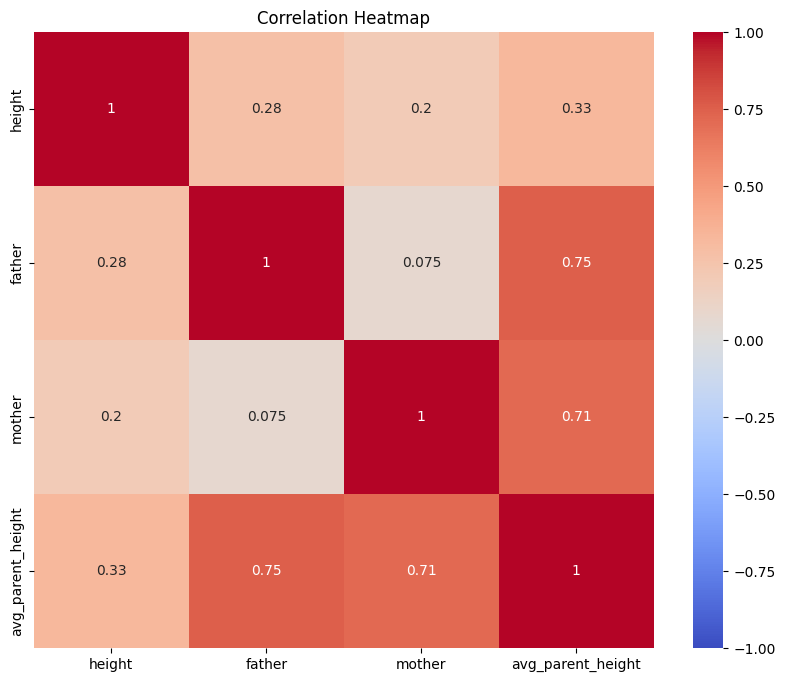

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = df[['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height'
print(correlations['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Correlation coefficients of son's height

height               1.000000
avg_parent_height    0.488271
father               0.392561
mother               0.334667
Name: height, dtype: float64


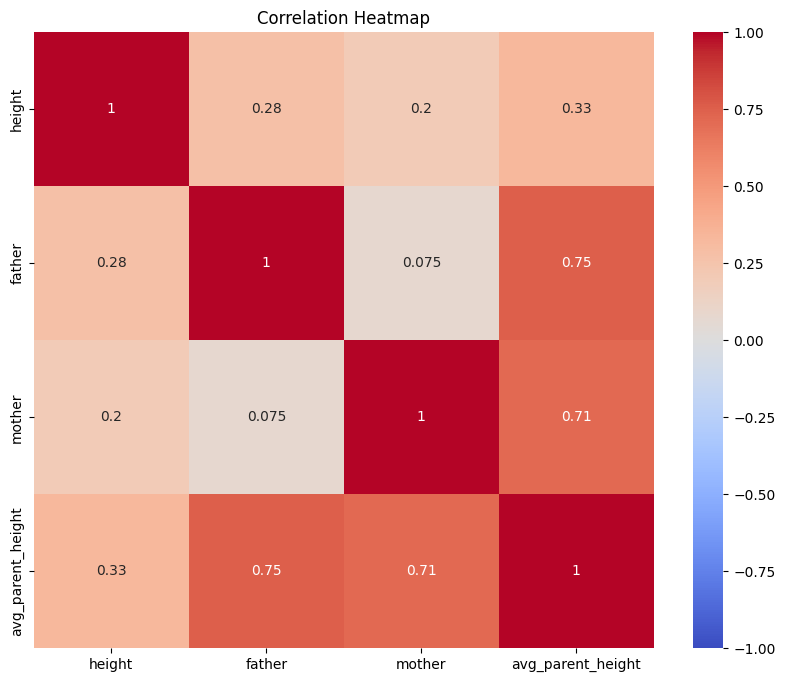

In [18]:
# prompt: Correlation coefficients of son's height

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations for sons only
correlations_sons = df[df['gender'] == 1][['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height' for sons
print(correlations_sons['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



# Correlation coefficients of daughter's height

height               1.000000
avg_parent_height    0.541610
father               0.458515
mother               0.314607
Name: height, dtype: float64


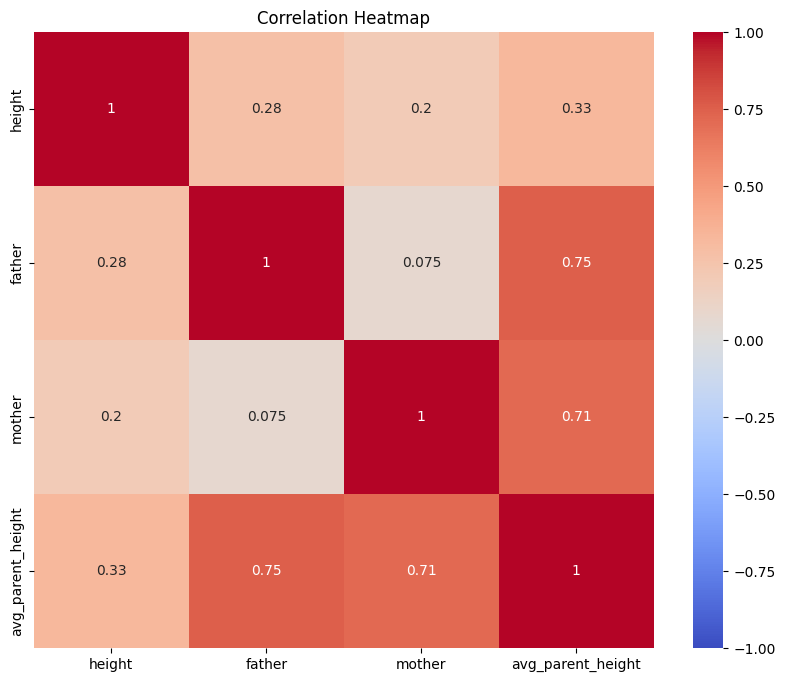

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations for sons only
correlations_sons = df[df['gender'] == 0][['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height' for sons
print(correlations_sons['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# **Removing Outliers**

In [20]:
df_original.describe()

,father,mother,gender,height,kids,male,female,avg_parent_height
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,69.239438,64.076180,0.516854,66.756404,6.119101,0.516854,0.483146,66.657809
std,2.480363,2.315739,0.499997,3.586242,2.691355,0.499997,0.499997,1.758850
min,62.000000,58.000000,0.000000,56.000000,1.000000,0.000000,0.000000,62.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000,0.000000,0.000000,65.500000
50%,69.000000,64.000000,1.000000,66.500000,6.000000,1.000000,0.000000,66.750000
75%,71.000000,65.500000,1.000000,69.700000,8.000000,1.000000,1.000000,67.500000
max,78.500000,70.500000,1.000000,79.000000,15.000000,1.000000,1.000000,72.750000


# quartile-based outlier removal method

In [21]:
# prompt: generate code for removing outliers based on quartile based outlier removal method

# Define lower and upper bounds
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data based on the bounds
df_filtered = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)]

# Print the updated DataFrame
print(df_filtered)


    family  father  mother  gender  height  kids  male  female  \
0        1    78.5    67.0       1    73.2     4     1       0   
1        1    78.5    67.0       0    69.2     4     0       1   
2        1    78.5    67.0       0    69.0     4     0       1   
3        1    78.5    67.0       0    69.0     4     0       1   
4        2    75.5    66.5       1    73.5     4     1       0   
..     ...     ...     ...     ...     ...   ...   ...     ...   
885    203    62.0    66.0       1    64.0     3     1       0   
886    203    62.0    66.0       0    62.0     3     0       1   
887    203    62.0    66.0       0    61.0     3     0       1   
888    204    62.5    63.0       1    66.5     2     1       0   
889    204    62.5    63.0       0    57.0     2     0       1   

     avg_parent_height  
0                72.75  
1                72.75  
2                72.75  
3                72.75  
4                71.00  
..                 ...  
885              64.00  
886    

# Dataset before removing outliers

In [20]:

# Print a summary of the dataset, including the count, mean, standard deviation, minimum, and maximum for each column
df.describe()


,father,mother,gender,height,kids,male,female,avg_parent_height
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,69.239438,64.076180,0.516854,66.756404,6.119101,0.516854,0.483146,66.657809
std,2.480363,2.315739,0.499997,3.586242,2.691355,0.499997,0.499997,1.758850
min,62.000000,58.000000,0.000000,56.000000,1.000000,0.000000,0.000000,62.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000,0.000000,0.000000,65.500000
50%,69.000000,64.000000,1.000000,66.500000,6.000000,1.000000,0.000000,66.750000
75%,71.000000,65.500000,1.000000,69.700000,8.000000,1.000000,1.000000,67.500000
max,78.500000,70.500000,1.000000,79.000000,15.000000,1.000000,1.000000,72.750000


# Dataset after removing Outliers

In [21]:
# prompt: describe about dataset after removing outliers

# Print a summary of the filtered dataset, including the count, mean, standard deviation, minimum, and maximum for each column
df_filtered.describe()


,father,mother,gender,height,kids,male,female,avg_parent_height
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,69.238583,64.075141,0.516310,66.742632,6.118110,0.516310,0.483690,66.656862
std,2.481628,2.316835,0.500015,3.564634,2.692708,0.500015,0.500015,1.759613
min,62.000000,58.000000,0.000000,56.000000,1.000000,0.000000,0.000000,62.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000,0.000000,0.000000,65.500000
50%,69.000000,64.000000,1.000000,66.500000,6.000000,1.000000,0.000000,66.750000
75%,71.000000,65.500000,1.000000,69.700000,8.000000,1.000000,1.000000,67.500000
max,78.500000,70.500000,1.000000,78.000000,15.000000,1.000000,1.000000,72.750000


In [22]:
if df.shape == df_filtered.shape:
  print("no outliers")
else:
  print("outliers")

outliers


# **Correlation coefficients after removing outliers**

# Correlation coefficients of child's height

height               1.000000
avg_parent_height    0.328544
father               0.277463
mother               0.201852
Name: height, dtype: float64


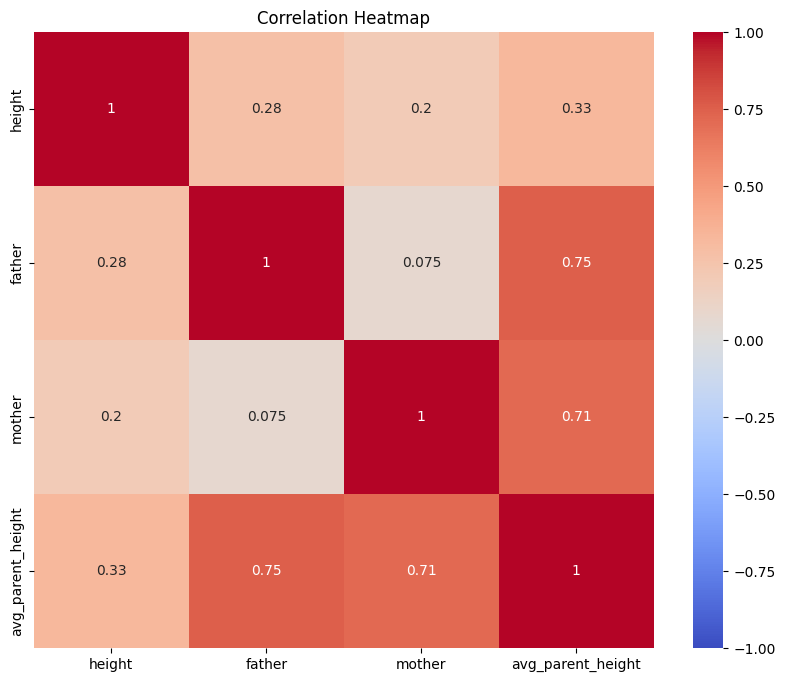

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = df_filtered[['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height'
print(correlations['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Correlation coefficients of son's height

height               1.000000
avg_parent_height    0.491557
father               0.395694
mother               0.336336
Name: height, dtype: float64


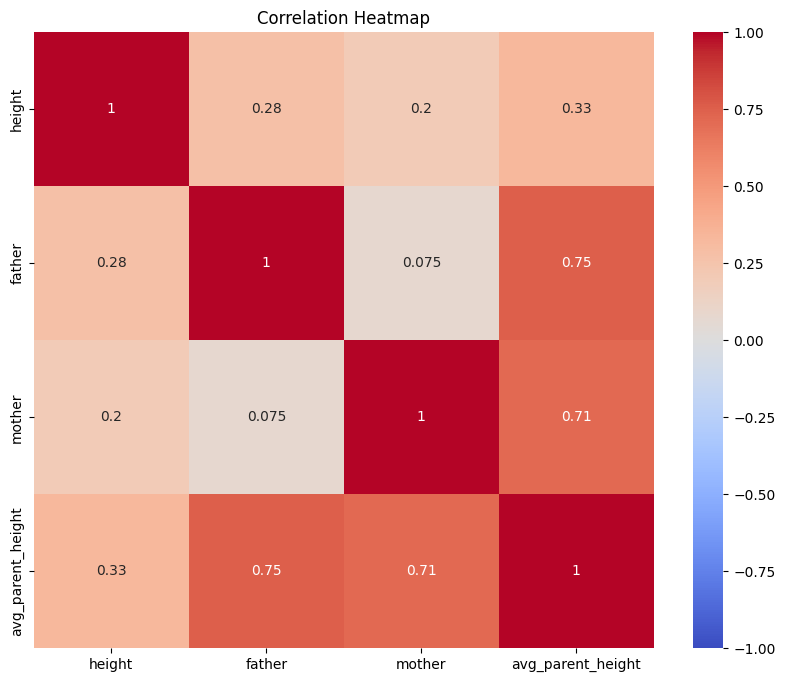

In [ ]:
# prompt: Correlation coefficients of son's height

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations for sons only
correlations_sons = df_filtered[df_filtered['gender'] == 1][['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height' for sons
print(correlations_sons['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



# Correlation coefficients of daughter's height

height               1.000000
avg_parent_height    0.541610
father               0.458515
mother               0.314607
Name: height, dtype: float64


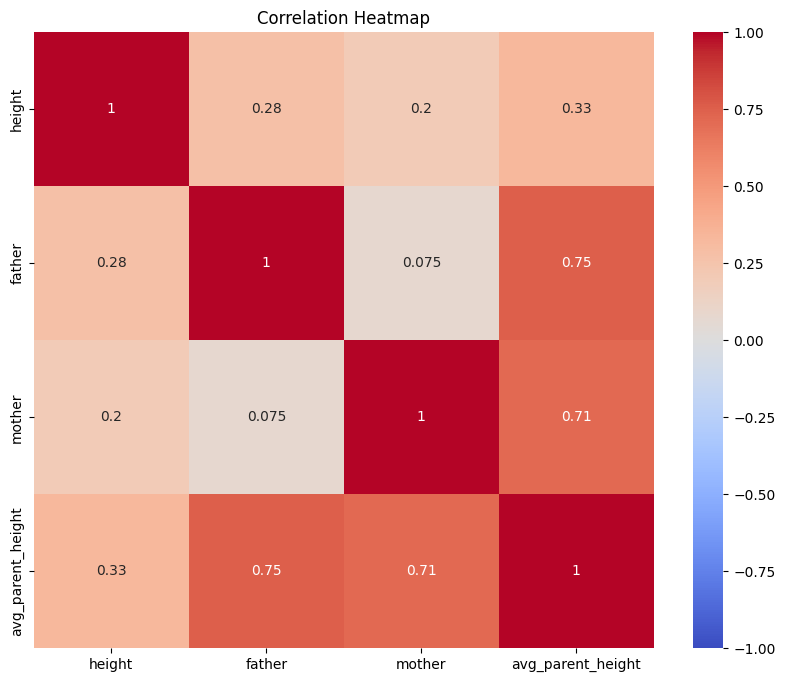

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations for sons only
correlations_sons = df_filtered[df_filtered['gender'] == 0][['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height' for sons
print(correlations_sons['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# **Splitting Data**

# Original height data splitting

In [23]:
# prompt: split the data df_original into training and testing data

from sklearn.model_selection import train_test_split

# Separate features (independent variables) and target (dependent variable)
features = df_original[['father', 'mother']]
target = df_original['height']

# Split the data into training and testing sets
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train_org.shape)
print("X_test shape:", X_test_org.shape)
print("y_train shape:", y_train_org.shape)
print("y_test shape:", y_test_org.shape)


X_train shape: (712, 2)
X_test shape: (178, 2)
y_train shape: (712,)
y_test shape: (178,)


# Splitting data (before removing outliers)

In [24]:
# prompt: generate code to split tghe data into training and testing data before removing outliers

# Define features and target
features = df[['father', 'mother', 'gender', 'avg_parent_height']]
target = df['height']

# Split the data into training and testing sets
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", b_X_train.shape)
print("y_train shape:", b_y_train.shape)
print("X_test shape:", b_X_test.shape)
print("y_test shape:", b_y_test.shape)


X_train shape: (712, 4)
y_train shape: (712,)
X_test shape: (178, 4)
y_test shape: (178,)


# Splitting data (after removing outliers)

In [49]:
# prompt: genearete code to split data into trianing and tesing

from sklearn.model_selection import train_test_split

# Define features and target
features = df_filtered[['father', 'mother', 'gender', 'avg_parent_height']]
target = df_filtered['height']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (711, 4)
y_train shape: (711,)
X_test shape: (178, 4)
y_test shape: (178,)


# **Models** (for original data)

# Linear regression model

In [29]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression instead

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_org = model.predict(X_test_org)

# Print the predicted target values
print(predicted_target_org)

[67.29965235 67.15908834 68.11430162 67.15908834 66.71021648 64.46585716
 67.04725911 65.25177165 66.71021648 65.89712214 66.23260984 67.94500284
 66.00895137 69.37020988 65.33486611 66.42458545 65.6447289  66.09360076
 65.83965259 64.83007963 69.37020988 67.44021636 67.18782312 67.29965235
 66.26134461 69.2500712  67.29965235 67.22393438 66.26134461 66.1207806
 69.62866106 67.29965235 68.08556684 66.71021648 66.92106249 67.94500284
 67.28528496 65.61599412 66.71021648 67.32838712 65.65909629 64.46585716
 66.33162662 65.50416489 67.48176358 66.93542988 67.04725911 66.93542988
 66.14951538 67.29965235 65.89712214 68.85711395 66.03768615 68.30922531
 67.48176358 67.33576361 66.92106249 66.09360076 67.94500284 67.0616265
 69.37020988 67.15908834 66.79486587 67.29965235 66.51373785 66.93542988
 66.9769771  67.44021636 65.33486611 66.79486587 64.4083876  67.29965235
 67.94500284 64.21346392 67.08880634 66.93542988 69.37020988 66.71021648
 67.18782312 65.33486611 67.29965235 65.46106273 67.1

In [27]:
# prompt: generate code for what was the accuracy that i got

from sklearn.metrics import r2_score

# Calculate the R^2 score of the predictions
lr_accuracy_org = r2_score(y_test_org, predicted_target_org)

# Print the accuracy
print("Accuracy:", lr_accuracy_org)

Accuracy: 0.11584237747872983


In [28]:
# prompt: generate code for precision recall f1 score and RMSE for above linear regression model

from sklearn.metrics import precision_recall_fscore_support, mean_squared_error
import numpy as np

# Assuming you have y_test_org and predicted_target_org from your Linear Regression model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = y_test_org.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_org]
y_true_binary = [1 if true > threshold else 0 for true in y_test_org]

# Calculate Precision, Recall, F1-score
precision_lr_org, recall_lr_org, f1_lr_org, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision: {precision_lr_org}")
print(f"Recall: {recall_lr_org}")
print(f"F1-Score: {f1_lr_org}")

# Calculate RMSE
rmse_lr_org = np.sqrt(mean_squared_error(y_test_org, predicted_target_org))
print(f"RMSE: {rmse_lr_org}")


Precision: 0.5360824742268041
Recall: 0.5909090909090909
F1-Score: 0.5621621621621622
RMSE: 3.4669866550501616


# SVR Linear Model

In [30]:
# prompt: generate code for svr linear model

from sklearn.svm import SVR

# Create a Support Vector Regression (SVR) model with a linear kernel
model_svr_linear = SVR(kernel='linear')

# Train the model on the training data
model_svr_linear.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_svr_linear_org = model_svr_linear.predict(X_test_org)

# Print the predicted target values
print(predicted_target_svr_linear_org)

[67.05642488 66.89649314 67.9007503  66.89649314 66.50962958 64.5753118
 66.85182642 65.3043722  66.50962958 65.87350085 66.007501   67.62555354
 65.91816757 68.85905025 65.23377389 66.33327045 65.66890239 66.05576595
 65.6429708  64.82457697 68.85905025 67.21635662 67.01175816 67.05642488
 66.12276603 68.82144336 67.05642488 66.99504534 66.12276603 65.96283429
 69.12834105 67.05642488 67.78548528 66.50962958 66.74952719 67.62555354
 66.99879237 65.55363737 66.50962958 67.1716899  65.72653491 64.5753118
 66.2027319  65.50897065 67.18105747 66.80715971 66.85182642 66.80715971
 66.07809931 67.05642488 65.87350085 68.45691316 66.03343259 67.87481871
 67.18105747 67.03971206 66.74952719 66.05576595 67.62555354 66.90945893
 68.85905025 66.89649314 66.64722796 67.05642488 66.32736448 66.80715971
 66.77186055 67.21635662 65.23377389 66.64722796 64.34478175 67.05642488
 67.62555354 64.37071334 66.81652727 66.80715971 68.85905025 66.50962958
 67.01175816 65.23377389 67.05642488 65.33607312 66.8

In [31]:
# Calculate the R^2 score of the predictions
svr_accuracy_org = r2_score(y_test_org, predicted_target_svr_linear_org)

# Print the accuracy
print("Accuracy (SVR linear):", svr_accuracy_org)

Accuracy (SVR linear): 0.10940683201888834


In [32]:
# prompt: generate code for precision recall f1 score and RMSE for above SVR linear model

# Assuming you have y_test_org and predicted_target_svr_linear_org from your SVR Linear model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = y_test_org.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_svr_linear_org]
y_true_binary = [1 if true > threshold else 0 for true in y_test_org]

# Calculate Precision, Recall, F1-score
precision_svr_org, recall_svr_org, f1_svr_org, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (SVR Linear): {precision_svr_org}")
print(f"Recall (SVR Linear): {recall_svr_org}")
print(f"F1-Score (SVR Linear): {f1_svr_org}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_org, predicted_target_svr_linear_org))
print(f"RMSE (SVR Linear): {rmse}")


Precision (SVR Linear): 0.5543478260869565
Recall (SVR Linear): 0.5795454545454546
F1-Score (SVR Linear): 0.5666666666666667
RMSE (SVR Linear): 3.479581409696342


# XGBoost Model

In [33]:
# prompt: generate code for xgboost model

from xgboost import XGBRegressor

# Create an XGBoost regressor model
model_xgb = XGBRegressor()

# Train the model on the training data
model_xgb.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_xgb_org = model_xgb.predict(X_test_org)

# Print the predicted target values
print(predicted_target_xgb_org)



[67.873245 67.518166 66.834175 67.518166 62.369953 64.332054 67.77574
 62.635853 62.369953 64.60051  64.39326  68.61605  65.510544 69.2991
 65.49255  71.34831  65.94842  69.25795  65.872025 64.5066   69.2991
 66.93436  66.46178  67.873245 65.40214  69.24652  67.873245 68.49648
 65.40214  64.71899  70.700066 67.873245 68.91817  62.369953 69.06957
 68.61605  68.113945 68.91104  62.369953 69.154686 63.75623  64.332054
 68.30035  65.72827  68.9775   68.18455  67.77574  68.18455  68.55086
 67.873245 64.60051  68.59197  64.899025 67.63471  68.9775   69.49433
 69.06957  69.25795  68.61605  65.12426  69.2991   67.518166 65.7098
 67.873245 68.65732  68.18455  64.548195 66.93436  65.49255  65.7098
 61.492844 67.873245 68.61605  63.6      68.04327  68.18455  69.2991
 62.369953 66.46178  65.49255  67.873245 70.61935  67.518166 64.50384
 66.43534  65.49255  64.52219  67.74114  65.74792  70.74586  62.70004
 65.8154   68.18455  65.44713  62.70004  66.753235 67.77574  63.6
 64.21085  65.49339  69.0026

In [34]:
# Calculate the R^2 score of the predictions
xgb_accuracy_org = r2_score(y_test_org, predicted_target_xgb_org)

# Print the accuracy
print("Accuracy (XGBoost):", xgb_accuracy_org)

Accuracy (XGBoost): -0.030703765619219725


In [35]:
# prompt: generate code for precision recall f1 score and RMSE for above XG boost model

# Assuming you have y_test_org and predicted_target_xgb_org from your XGBoost model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = y_test_org.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_xgb_org]
y_true_binary = [1 if true > threshold else 0 for true in y_test_org]

# Calculate Precision, Recall, F1-score
precision_xgb_org, recall_xgb_org, f1_xgb_org, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (XGBoost): {precision_xgb_org}")
print(f"Recall (XGBoost): {recall_xgb_org}")
print(f"F1-Score (XGBoost): {f1_xgb_org}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_org, predicted_target_xgb_org))
print(f"RMSE (XGBoost): {rmse}")


Precision (XGBoost): 0.5656565656565656
Recall (XGBoost): 0.6363636363636364
F1-Score (XGBoost): 0.5989304812834224
RMSE (XGBoost): 3.743296719386504


# Light GBM Model

In [35]:
# prompt: generate code for light gbm model

import lightgbm as lgb

# Create a LightGBM regressor model
model_lgb = lgb.LGBMRegressor()

# Train the model on the training data
model_lgb.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_lgb_org = model_lgb.predict(X_test_org)

# Print the predicted target values
print(predicted_target_lgb_org)



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 2
[LightGBM] [Info] Start training from score 66.765028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [36]:
# Calculate the R^2 score of the predictions
lgb_accuracy_org = r2_score(y_test_org, predicted_target_lgb_org)

# Print the accuracy
print("Accuracy (LightGBM):", lgb_accuracy_org)

Accuracy (LightGBM): 0.06947058993626565


In [103]:
# prompt: generate code for precision recall f1 score and RMSE for above Light GBM model

# Assuming you have y_test_org and predicted_target_lgb_org from your LightGBM model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = y_test_org.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_lgb_org]
y_true_binary = [1 if true > threshold else 0 for true in y_test_org]

# Calculate Precision, Recall, F1-score
precision_lgb_org, recall_lgb_org, f1_lgb_org, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (LightGBM): {precision_lgb_org}")
print(f"Recall (LightGBM): {recall_lgb_org}")
print(f"F1-Score (LightGBM): {f1_lgb_org}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_org, predicted_target_lgb_org))
print(f"RMSE (LightGBM): {rmse}")


Precision (LightGBM): 0.5425531914893617
Recall (LightGBM): 0.5795454545454546
F1-Score (LightGBM): 0.5604395604395604
RMSE (LightGBM): 3.5567420890413897


# MPH Model

In [105]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support, accuracy_score

# Assuming X_train_org, X_test_org, y_train_org, y_test_org are already defined

# Define the MPH model
model_mph = MultiOutputRegressor(LinearRegression())

# Reshape y_train to have two dimensions if necessary
y_train_reshaped = y_train_org.values.reshape(-1, 1)

# Train the model on the training data using the reshaped target variable
model_mph.fit(X_train_org, y_train_reshaped)

# Predict the target values for the test data
predicted_target_mph = model_mph.predict(X_test_org)

# Calculate RMSE (Root Mean Squared Error) for each output
rmse_mph_org = np.sqrt(mean_squared_error(y_test_org, predicted_target_mph))

# Convert regression predictions to binary classification (assuming threshold is the mean)
threshold = y_test_org.mean(axis=0)  # mean of all target variables
y_pred_binary = (predicted_target_mph > threshold).astype(int)
y_true_binary = (y_test_org > threshold).astype(int)

# Calculate accuracy, precision, recall, F1-score for each output variable
accuracy_mph_org = accuracy_score(y_true_binary, y_pred_binary)
precision_mph_org, recall_mph_org, f1_mph_org, _ = precision_recall_fscore_support(
    y_true_binary, y_pred_binary, average='macro', zero_division=0
)

# Display results
print(f'RMSE (MPH): {rmse_mph_org:.4f}')
print(f'Accuracy (MPH): {accuracy_mph_org:.4f}')
print(f'Precision (MPH): {precision_mph_org:.4f}')
print(f'Recall (MPH): {recall_mph_org:.4f}')
print(f'F1-Score (MPH): {f1_mph_org:.4f}')


RMSE (MPH): 3.4670
Accuracy (MPH): 0.5449
Precision (MPH): 0.5458
Recall (MPH): 0.5455
F1-Score (MPH): 0.5442


# Decision Tree

In [37]:
# prompt: generate code for decision tree model on X_train_org, X_test_org, y_train_org, y_test_org

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Create a Decision Tree Regression model
model_dt = DecisionTreeRegressor(random_state=42)  # You can adjust parameters as needed

# Train the model on the training data
model_dt.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_dt_org = model_dt.predict(X_test_org)

# Calculate the R^2 score of the predictions
dt_accuracy_org = r2_score(y_test_org, predicted_target_dt_org)

# Print the accuracy
print("Accuracy (Decision Tree):", dt_accuracy_org)

# Calculate RMSE
rmse_dt_org = np.sqrt(mean_squared_error(y_test_org, predicted_target_dt_org))
print(f"RMSE (Decision Tree): {rmse_dt_org}")

# You can further analyze the model's performance by examining the feature importance,
# visualizing the tree, or using other metrics like MAE.


Accuracy (Decision Tree): -0.03177023704741355
RMSE (Decision Tree): 3.745232817323641


In [38]:
# prompt: generate code for precision recall f1 score and RMSE for above decision tree model

# Assuming you have y_test_org and predicted_target_dt_org from your Decision Tree model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = y_test_org.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_dt_org]
y_true_binary = [1 if true > threshold else 0 for true in y_test_org]

# Calculate Precision, Recall, F1-score
precision_dt_org, recall_dt_org, f1_dt_org, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (Decision Tree): {precision_dt_org}")
print(f"Recall (Decision Tree): {recall_dt_org}")
print(f"F1-Score (Decision Tree): {f1_dt_org}")

# Calculate RMSE
# rmse_dt_org = np.sqrt(mean_squared_error(y_test_org, predicted_target_dt_org))
# print(f"RMSE (Decision Tree): {rmse_dt_org}")


Precision (Decision Tree): 0.5612244897959183
Recall (Decision Tree): 0.625
F1-Score (Decision Tree): 0.5913978494623656


# Random Forest

In [110]:
# prompt: generate code for precision recall f1 score and RMSE and accuracy for random forest  X_train_org, X_test_org, y_train_org, y_test_org

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, precision_recall_fscore_support

# Create a Random Forest Regression model
model_rf = RandomForestRegressor(random_state=42)  # You can adjust parameters as needed

# Train the model on the training data
model_rf.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_rf_org = model_rf.predict(X_test_org)

# Calculate the R^2 score of the predictions
rf_accuracy_org = r2_score(y_test_org, predicted_target_rf_org)

# Print the accuracy
print("Accuracy (Random Forest):", rf_accuracy_org)


# Assuming you have y_test_org and predicted_target_rf_org from your Random Forest model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = y_test_org.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_rf_org]
y_true_binary = [1 if true > threshold else 0 for true in y_test_org]

# Calculate Precision, Recall, F1-score
precision_rf_org, recall_rf_org, f1_rf_org, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (Random Forest): {precision_rf_org}")
print(f"Recall (Random Forest): {recall_rf_org}")
print(f"F1-Score (Random Forest): {f1_rf_org}")

# Calculate RMSE
rmse_rf_org = np.sqrt(mean_squared_error(y_test_org, predicted_target_rf_org))
print(f"RMSE (Random Forest): {rmse_rf_org}")


Accuracy (Random Forest): -0.01644331081742534
Precision (Random Forest): 0.5510204081632653
Recall (Random Forest): 0.6136363636363636
F1-Score (Random Forest): 0.5806451612903226
RMSE (Random Forest): 3.7173110557523885


# ANN model

In [39]:
# prompt: generate code for precision recall f1 score and RMSE and accuracy for ANN  X_train_org, X_test_org, y_train_org, y_test_org

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, r2_score

# Create an ANN model
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_org.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_ann.fit(X_train_org, y_train_org, epochs=100, batch_size=32, validation_split=0.2)

# Predict on the test data
predicted_target_ann_org = model_ann.predict(X_test_org).flatten()

# Calculate R^2 score
ann_accuracy_org = r2_score(y_test_org, predicted_target_ann_org)
print("Accuracy (ANN):", ann_accuracy_org)

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = y_test_org.mean()
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_ann_org]
y_true_binary = [1 if true > threshold else 0 for true in y_test_org]

# Calculate Precision, Recall, F1-score
precision_ann_org, recall_ann_org, f1_ann_org, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (ANN): {precision_ann_org}")
print(f"Recall (ANN): {recall_ann_org}")
print(f"F1-Score (ANN): {f1_ann_org}")

# Calculate RMSE
rmse_ann_org = np.sqrt(mean_squared_error(y_test_org, predicted_target_ann_org))
print(f"RMSE (ANN): {rmse_ann_org}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2160.7117 - mae: 45.2966 - val_loss: 244.2764 - val_mae: 15.2399
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.0373 - mae: 8.3430 - val_loss: 48.6519 - val_mae: 6.0920
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.2522 - mae: 6.1482 - val_loss: 12.4581 - val_mae: 2.9191
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0848 - mae: 2.9022 - val_loss: 15.0695 - val_mae: 3.1520
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.2967 - mae: 2.9106 - val_loss: 12.4615 - val_mae: 2.9180
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0754 - mae: 2.9224 - val_loss: 12.8412 - val_mae: 2.9438
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.1331 - mae: 2.8196 - val_loss: 12.7545 - val_mae: 2.9373
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.6690 - mae: 2.9113 - val_loss: 12.7888 - val_mae: 2.9400
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 

# **Models** (Before removing outliers)

# Linear refression model

In [112]:
# prompt: give me code on b_X_train, b_X_test, b_y_train, b_y_test for linear regression model find accuracy f1 accuracy recall precision RMSE for linear regression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target = model.predict(b_X_test)

# Calculate the R^2 score of the predictions
lr_accuracy_bf = r2_score(b_y_test, predicted_target)
print("Accuracy:", lr_accuracy_bf)

# Assuming you have b_y_test and predicted_target from your Linear Regression model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = b_y_test.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target]
y_true_binary = [1 if true > threshold else 0 for true in b_y_test]

# Calculate Precision, Recall, F1-score
precision_lr_bf, recall_lr_bf, f1_lr_bf, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision: {precision_lr_bf}")
print(f"Recall: {recall_lr_bf}")
print(f"F1-Score: {f1_lr_bf}")

# Calculate RMSE
rmse_lr_bf = np.sqrt(mean_squared_error(b_y_test, predicted_target))
print(f"RMSE: {rmse_lr_bf}")

Accuracy: 0.7014300909729096
Precision: 0.8666666666666667
Recall: 0.8863636363636364
F1-Score: 0.8764044943820225
RMSE: 2.0146997854216577


# SVR Linear model

In [113]:
# prompt: give me code on b_X_train, b_X_test, b_y_train, b_y_test  find accuracy f1 accuracy recall precision RMSE for lSVR linear model

# Create a Support Vector Regression (SVR) model with a linear kernel
model_svr_linear = SVR(kernel='linear')

# Train the model on the training data
model_svr_linear.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target_svr_linear = model_svr_linear.predict(b_X_test)

# Calculate the R^2 score of the predictions
svr_accuracy_bf = r2_score(b_y_test, predicted_target_svr_linear)

# Print the accuracy
print("Accuracy (SVR linear):", svr_accuracy_bf)

# Assuming you have b_y_test and predicted_target_svr_linear from your SVR Linear model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = b_y_test.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_svr_linear]
y_true_binary = [1 if true > threshold else 0 for true in b_y_test]

# Calculate Precision, Recall, F1-score
precision_svr_bf, recall_svr_bf, f1_svr_bf, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (SVR Linear): {precision_svr_bf}")
print(f"Recall (SVR Linear): {recall_svr_bf}")
print(f"F1-Score (SVR Linear): {f1_svr_bf}")

# Calculate RMSE
rmse_svr_bf = np.sqrt(mean_squared_error(b_y_test, predicted_target_svr_linear))
print(f"RMSE (SVR Linear): {rmse_svr_bf}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy (SVR linear): 0.7013408326034938
Precision (SVR Linear): 0.8586956521739131
Recall (SVR Linear): 0.8977272727272727
F1-Score (SVR Linear): 0.8777777777777778
RMSE (SVR Linear): 2.0150009131880378


# XGBoost Model

In [114]:
# prompt: give me code on b_X_train, b_X_test, b_y_train, b_y_test for linear regression model find accuracy f1 accuracy recall precision RMSE for XG boost model

# XGBoost Model (Before removing outliers)

# Create an XGBoost regressor model
model_xgb = XGBRegressor()

# Train the model on the training data
model_xgb.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target_xgb = model_xgb.predict(b_X_test)

# Calculate the R^2 score of the predictions
xgb_accuracy_bf = r2_score(b_y_test, predicted_target_xgb)

# Print the accuracy
print("Accuracy (XGBoost):", xgb_accuracy_bf)

# Assuming you have b_y_test and predicted_target_xgb from your XGBoost model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = b_y_test.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_xgb]
y_true_binary = [1 if true > threshold else 0 for true in b_y_test]

# Calculate Precision, Recall, F1-score
precision_xgb_bf, recall_xgb_bf, f1_xgb_bf, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (XGBoost): {precision_xgb_bf}")
print(f"Recall (XGBoost): {recall_xgb_bf}")
print(f"F1-Score (XGBoost): {f1_xgb_bf}")

# Calculate RMSE
rmse_xgb_bf = np.sqrt(mean_squared_error(b_y_test, predicted_target_xgb))
print(f"RMSE (XGBoost): {rmse_xgb_bf}")

Accuracy (XGBoost): 0.6328539814624139
Precision (XGBoost): 0.8947368421052632
Recall (XGBoost): 0.7727272727272727
F1-Score (XGBoost): 0.8292682926829268
RMSE (XGBoost): 2.234121220871213


# Light GBM model

In [40]:
# prompt: give me code on b_X_train, b_X_test, b_y_train, b_y_test for linear regression model find accuracy f1 accuracy recall precision RMSE for  light GBM model

# LightGBM Model (Before removing outliers)
import lightgbm as lgb
# Create a LightGBM regressor model
model_lgb = lgb.LGBMRegressor()

# Train the model on the training data
model_lgb.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target_lgb = model_lgb.predict(b_X_test)

# Calculate the R^2 score of the predictions
lgb_accuracy_bf = r2_score(b_y_test, predicted_target_lgb)

# Print the accuracy
print("Accuracy (LightGBM):", lgb_accuracy_bf)

# Assuming you have b_y_test and predicted_target_lgb from your LightGBM model

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = b_y_test.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_lgb]
y_true_binary = [1 if true > threshold else 0 for true in b_y_test]

# Calculate Precision, Recall, F1-score
precision_lgb_bf, recall_lgb_bf, f1_lgb_bf, _ = precision_recall_fscore_support(y_true_binary, y_pred_binary, average='binary')

print(f"Precision (LightGBM): {precision_lgb_bf}")
print(f"Recall (LightGBM): {recall_lgb_bf}")
print(f"F1-Score (LightGBM): {f1_lgb_bf}")

# Calculate RMSE
rmse_lgb_bf = np.sqrt(mean_squared_error(b_y_test, predicted_target_lgb))
print(f"RMSE (LightGBM): {rmse_lgb_bf}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] Start training from score 66.765028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

# MPH model

In [42]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import precision_recall_fscore_support, r2_score, mean_squared_error
import numpy as np

# Assuming b_X_train, b_y_train, b_X_test, b_y_test are already defined as DataFrames
# Example:
# b_X_train = ...  # Training features
# b_y_train = ...  # Training target (single or multi-output DataFrame)
# b_X_test = ...   # Test features
# b_y_test = ...   # Test target (single or multi-output DataFrame)

# Check if b_y_train is a single output (1D array) and reshape if needed
if len(b_y_train.shape) == 1:
    b_y_train = b_y_train.values.reshape(-1, 1)
    b_y_test = b_y_test.values.reshape(-1, 1)

# Define the MPH model
if b_y_train.shape[1] > 1:  # Multi-output case
    model_mph = MultiOutputRegressor(LinearRegression())
else:  # Single-output case
    model_mph = LinearRegression()

# Train the model on the training data
model_mph.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target_mph = model_mph.predict(b_X_test)

# Calculate the R^2 score (accuracy)
mph_accuracy_bf = r2_score(b_y_test, predicted_target_mph, multioutput='uniform_average')
print("Accuracy (R^2, MPH):", mph_accuracy_bf)

# Calculate RMSE (Root Mean Squared Error)
rmse_mph_bf = np.sqrt(mean_squared_error(b_y_test, predicted_target_mph))
print(f"RMSE (MPH): {rmse_mph_bf}")

# Convert regression predictions to binary classification
# Each target will have its own threshold (mean of each column in y_test)
thresholds = b_y_test.mean(axis=0)
y_pred_binary = (predicted_target_mph > thresholds).astype(int)
y_true_binary = (b_y_test > thresholds).astype(int)

# Calculate Precision, Recall, F1-score for multi-output case (micro-average across all outputs)
precision_mph_bf, recall_mph_bf, f1_mph_bf, _ = precision_recall_fscore_support(
    y_true_binary, y_pred_binary, average='micro', zero_division=0
)

print(f"Precision (MPH): {precision_mph_bf}")
print(f"Recall (MPH): {recall_mph_bf}")
print(f"F1-Score (MPH): {f1_mph_bf}")


Accuracy (R^2, MPH): 0.7014300909729096
RMSE (MPH): 2.0146997854216577
Precision (MPH): 0.8764044943820225
Recall (MPH): 0.8764044943820225
F1-Score (MPH): 0.8764044943820225


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, r2_score
import numpy as np

# Assuming b_X_train, b_X_test, b_y_train, b_y_test are already defined

# Decision Tree model (before outlier removal)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(b_X_train, b_y_train)
dt_pred = dt_model.predict(b_X_test)

# ----- Metrics Before Outlier Removal -----

# Mean Squared Error (MSE) and R²
dt_mse_bf = mean_squared_error(b_y_test, dt_pred)
dt_r2 = r2_score(b_y_test, dt_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse_dt_bf = np.sqrt(dt_mse_bf)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_dt = np.mean(np.abs((b_y_test - dt_pred) / b_y_test)) * 100

# Calculate accuracy as a decimal
dt_accuracy_bf = 1 - mape_dt / 100

# Convert regression predictions to binary classification
threshold = b_y_test.mean()  # You can customize this threshold if necessary
y_pred_binary = (dt_pred > threshold).astype(int)
y_true_binary = (b_y_test > threshold).astype(int)

# Calculate Precision, Recall, F1-score for binary classification
precision_dt_bf, recall_dt_bf, f1_dt_bf, _ = precision_recall_fscore_support(
    y_true_binary, y_pred_binary, average='binary', zero_division=0
)

# Display results
print(f'Decision Tree (before outlier removal) - MSE: {dt_mse_bf}, R²: {dt_r2}, RMSE: {rmse_dt_bf}')
print(f'Accuracy (as a decimal): {dt_accuracy_bf:.4f}')
print(f'Precision: {precision_dt_bf:.2f}, Recall: {recall_dt_bf:.2f}, F1-Score: {f1_dt_bf:.2f}')


Decision Tree (before outlier removal) - MSE: 5.098371353534131, R²: 0.6249779351174465, RMSE: 2.2579573409464873
Accuracy (as a decimal): 0.9389
Precision: 0.88, Recall: 0.78, F1-Score: 0.83


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, r2_score
import numpy as np

# Assuming b_X_train, b_X_test, b_y_train, b_y_test are already defined

# Random Forest model (before outlier removal)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(b_X_train, b_y_train)
rf_pred = rf_model.predict(b_X_test)

# ----- Metrics Before Outlier Removal -----

# Mean Squared Error (MSE) and R²
rf_mse = mean_squared_error(b_y_test, rf_pred)
rf_r2 = r2_score(b_y_test, rf_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse_rf_bf = np.sqrt(rf_mse)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_rf = np.mean(np.abs((b_y_test - rf_pred) / b_y_test)) * 100

# Calculate accuracy as a decimal
rf_accuracy_bf = 1 - mape_rf / 100

# Convert regression predictions to binary classification
threshold = b_y_test.mean()  # You can customize this threshold if necessary
y_pred_binary = (rf_pred > threshold).astype(int)
y_true_binary = (b_y_test > threshold).astype(int)

# Calculate Precision, Recall, F1-score for binary classification
precision_rf_bf, recall_rf_bf, f1_rf_bf, _ = precision_recall_fscore_support(
    y_true_binary, y_pred_binary, average='binary', zero_division=0
)

# Display results
print(f'Random Forest (before outlier removal) - MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}, RMSE: {rmse_rf_bf:.4f}')
print(f'Accuracy (as a decimal): {rf_accuracy_bf:.4f}')
print(f'Precision: {precision_rf_bf:.2f}, Recall: {recall_rf_bf:.2f}, F1-Score: {f1_rf_bf:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest (before outlier removal) - MSE: 4.7503, R²: 0.6506, RMSE: 2.1795
Accuracy (as a decimal): 0.9399
Precision: 0.88, Recall: 0.81, F1-Score: 0.84


# ANN model

In [46]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, r2_score

# Assuming b_X_train, b_X_test, b_y_train, b_y_test are already defined

# ANN model (before outlier removal)
ann_model = MLPRegressor(random_state=42, max_iter=1000)
ann_model.fit(b_X_train, b_y_train)
ann_pred = ann_model.predict(b_X_test)

# ----- Metrics Before Outlier Removal -----

# Mean Squared Error (MSE) and R²
ann_mse = mean_squared_error(b_y_test, ann_pred)
ann_r2 = r2_score(b_y_test, ann_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse_ann_bf = np.sqrt(ann_mse)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_ann = np.mean(np.abs((b_y_test - ann_pred) / b_y_test)) * 100

# Calculate accuracy as a decimal
ann_accuracy_bf = 1 - mape_ann / 100

# Convert regression predictions to binary classification
threshold = b_y_test.mean()  # You can customize this threshold if necessary
y_pred_binary = (ann_pred > threshold).astype(int)
y_true_binary = (b_y_test > threshold).astype(int)

# Calculate Precision, Recall, F1-score for binary classification
precision_ann_bf, recall_ann_bf, f1_ann_bf, _ = precision_recall_fscore_support(
    y_true_binary, y_pred_binary, average='binary', zero_division=0
)

# Display results
print(f'ANN (before outlier removal) - MSE: {ann_mse:.4f}, R²: {ann_r2:.4f}, RMSE: {rmse_ann_bf:.4f}')
print(f'Accuracy (as a decimal): {ann_accuracy_bf:.4f}')
print(f'Precision: {precision_ann_bf:.2f}, Recall: {recall_ann_bf:.2f}, F1-Score: {f1_ann_bf:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



ANN (before outlier removal) - MSE: 4.4123, R²: 0.6754, RMSE: 2.1005
Accuracy (as a decimal): 0.9422
Precision: 0.87, Recall: 0.83, F1-Score: 0.85


# **Models** (After removing outliers)

# Linear regression model

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test, and the Linear Regression model (model) are already defined

# Train the Linear Regression model if not already done
model.fit(X_train, y_train)

# Make predictions on the test data
predicted_target = model.predict(X_test)

# Ensure both training and test data have consistent features
if X_train.shape[1] != X_test.shape[1]:
    raise ValueError("Mismatch in the number of features between training and testing data.")

# ----- Calculate Metrics -----

# 1. Accuracy using R^2 Score (for regression)
lr_accuracy_af = r2_score(y_test, predicted_target)
print(f" Accuracy (Linear Regression): {lr_accuracy_af:.4f}")

# 2. RMSE (Root Mean Squared Error)
rmse_lr_af = np.sqrt(mean_squared_error(y_test, predicted_target))
print(f"RMSE (Linear Regression): {rmse_lr_af:.4f}")

# 3. Convert regression predictions to binary classification
threshold = y_test.mean()
y_pred_binary = (predicted_target > threshold).astype(int)
y_true_binary = (y_test > threshold).astype(int)

# 4. Precision, Recall, and F1-Score
precision_lr_af = precision_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
recall_lr_af = recall_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
f1_lr_af = f1_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)

# Print Precision, Recall, F1-score
print(f"Precision (Linear Regression): {precision_lr_af:.4f}")
print(f"Recall (Linear Regression): {recall_lr_af:.4f}")
print(f"F1-Score (Linear Regression): {f1_lr_af:.4f}")


 Accuracy (Linear Regression): 0.6821
RMSE (Linear Regression): 2.0774
Precision (Linear Regression): 0.9048
Recall (Linear Regression): 0.8352
F1-Score (Linear Regression): 0.8686


# SVR linear model

In [54]:
# prompt: give me f1score accuracy RMSE recall precision use this using X_train, X_test, y_train, and y_test for SVR linear model

# Assuming you have b_X_train, b_X_test, b_y_train, b_y_test defined

# SVR Linear model
model_svr_linear = SVR(kernel='linear')
model_svr_linear.fit(b_X_train, b_y_train)
predicted_target_svr_linear = model_svr_linear.predict(b_X_test)

# ----- Metrics Calculation -----

# Mean Squared Error (MSE) and R²
svr_mse = mean_squared_error(b_y_test, predicted_target_svr_linear)
svr_r2 = r2_score(b_y_test, predicted_target_svr_linear)

# Calculate RMSE (Root Mean Squared Error)
rmse_svr_af = np.sqrt(svr_mse)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_svr = np.mean(np.abs((b_y_test - predicted_target_svr_linear) / b_y_test)) * 100

# Calculate accuracy as a decimal
svr_accuracy_af = 1 - mape_svr / 100

# Convert regression predictions to binary classification
threshold = b_y_test.mean()  # You can customize this threshold if necessary
y_pred_binary = (predicted_target_svr_linear > threshold).astype(int)
y_true_binary = (b_y_test > threshold).astype(int)

# Calculate Precision, Recall, F1-score for binary classification
precision_svr_af, recall_svr_af, f1_svr_af, _ = precision_recall_fscore_support(
    y_true_binary, y_pred_binary, average='binary', zero_division=0
)


# Display results
print(f'SVR Linear - MSE: {svr_mse:.4f}, R²: {svr_r2:.4f}, RMSE: {rmse_svr_af:.4f}')
print(f'Accuracy (as a decimal): {svr_accuracy_af:.4f}')
print(f'Precision: {precision_svr_af:.2f}, Recall: {recall_svr_af:.2f}, F1-Score: {f1_svr_af:.2f}')

SVR Linear - MSE: 4.0602, R²: 0.7013, RMSE: 2.0150
Accuracy (as a decimal): 0.9426
Precision: 0.86, Recall: 0.90, F1-Score: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# XGBoost model

In [64]:
from sklearn.metrics import r2_score, precision_score, recall_score, f1_score, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# XGBoost model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
predicted_target_xgb = model_xgb.predict(X_test)

# ----- Calculate Metrics -----

# 1. Accuracy (R^2 Score) for regression
xgb_accuracy = r2_score(y_test, predicted_target_xgb)
print(f"Accuracy (XGBoost): {xgb_accuracy:.4f}")

# 2. RMSE (Root Mean Squared Error)
rmse_xgb = np.sqrt(mean_squared_error(y_test, predicted_target_xgb))
print(f"RMSE (XGBoost): {rmse_xgb:.4f}")

# 3. Convert regression predictions to binary classification
threshold = y_test.mean()
y_pred_binary = (predicted_target_xgb > threshold).astype(int)
y_true_binary = (y_test > threshold).astype(int)

# 4. Precision, Recall, F1-Score
precision_xgb = precision_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
recall_xgb = recall_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
f1_xgb = f1_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)

# Print Precision, Recall, F1-score
print(f"Precision (XGBoost): {precision_xgb:.4f}")
print(f"Recall (XGBoost): {recall_xgb:.4f}")
print(f"F1-Score (XGBoost): {f1_xgb:.4f}")


ValueError: feature_names mismatch: ['father', 'mother', 'gender', 'avg_parent_height'] ['father', 'mother']
expected avg_parent_height, gender in input data

# Light GBM model

In [76]:
# prompt: give me f1score accuracy RMSE recall precision use this using X_train, X_test, y_train, and y_test for Light GBM model

# Assuming model_lgb is your trained LightGBM model
y_pred_lgb = model_lgb.predict(X_test)

# Calculate accuracy
lgb_accuracy = r2_score(y_test, y_pred_lgb)

# Calculate RMSE
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

# Convert regression predictions to binary classification (e.g., above/below average height)
threshold = y_test.mean()  # You can choose a different threshold if needed
y_pred_binary = [1 if pred > threshold else 0 for pred in y_pred_lgb]
y_true_binary = [1 if true > threshold else 0 for true in y_test]

# Calculate Precision, Recall, F1-score
precision_lgb, recall_lgb, f1_lgb, _ = precision_recall_fscore_support(
    y_true_binary, y_pred_binary, average='binary'
)

print(f"Accuracy (LightGBM): {lgb_accuracy}")
print(f"RMSE (LightGBM): {rmse_lgb}")
print(f"Precision (LightGBM): {precision_lgb}")
print(f"Recall (LightGBM): {recall_lgb}")
print(f"F1-Score (LightGBM): {f1_lgb}")

Accuracy (LightGBM): 0.7148437077491108
RMSE (LightGBM): 1.9674563825383735
Precision (LightGBM): 0.8777777777777778
Recall (LightGBM): 0.8681318681318682
F1-Score (LightGBM): 0.8729281767955801


# MPH model

In [77]:
# prompt: give me f1score accuracy RMSE recall precision use this using X_train, X_test, y_train, and y_test for MPH model

# Assuming you have your MPH model and predictions as:
# model_mph: Your trained MPH model
# predicted_target_mph: Predictions from your model on X_test

# Calculate predictions
predicted_target_mph = model_mph.predict(X_test)

# Calculate accuracy for MPH (using R^2 score)
mph_accuracy = r2_score(y_test, predicted_target_mph)
print(f"Accuracy (MPH): {mph_accuracy}")

# Calculate RMSE
rmse_mph = np.sqrt(mean_squared_error(y_test, predicted_target_mph))
print(f"RMSE (MPH): {rmse_mph}")

# For Precision, Recall, and F1-score, you need to convert regression predictions
# to binary classification (e.g., above/below average target value).
threshold = y_test.mean()
y_pred_binary = [1 if pred > threshold else 0 for pred in predicted_target_mph]
y_true_binary = [1 if true > threshold else 0 for true in y_test]


# Calculate Precision, Recall, F1-score
precision_mph = precision_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
recall_mph = recall_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
f1_mph = f1_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)

print(f"Precision (MPH): {precision_mph}")
print(f"Recall (MPH): {recall_mph}")
print(f"F1-Score (MPH): {f1_mph}")

Accuracy (MPH): 0.688310508912958
RMSE (MPH): 2.0569546337637203
Precision (MPH): 0.9101123595505618
Recall (MPH): 0.8901098901098901
F1-Score (MPH): 0.9


# Decision Tree

In [81]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_dt = np.sqrt(mean_squared_error(y_test, dt_pred))

# Convert regression predictions to binary classification using the mean as a threshold
threshold = y_test.mean()  # You can customize this threshold if necessary
y_pred_binary = (dt_pred > threshold).astype(int)
y_true_binary = (y_test > threshold).astype(int)

# Calculate accuracy
dt_accuracy = accuracy_score(y_true_binary, y_pred_binary)

# Calculate Precision, Recall, F1-score
precision_dt = precision_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
recall_dt = recall_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
f1_dt = f1_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)

# Display results
print(f"Accuracy (Decision Tree): {dt_accuracy:.4f}")
print(f"RMSE (Decision Tree): {rmse_dt:.4f}")
print(f"Precision (Decision Tree): {precision_dt:.4f}")
print(f"Recall (Decision Tree): {recall_dt:.4f}")
print(f"F1-Score (Decision Tree): {f1_dt:.4f}")


Accuracy (Decision Tree): 0.8371
RMSE (Decision Tree): 2.3457
Precision (Decision Tree): 0.8875
Recall (Decision Tree): 0.7802
F1-Score (Decision Tree): 0.8304


# Random Forest

In [82]:
# prompt: give me f1score accuracy RMSE recall precision use this using X_train, X_test, y_train, and y_test for random forest model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming rf_model is your trained Random Forest model
rf_pred = rf_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

# Convert regression predictions to binary classification using the mean as a threshold
threshold = y_test.mean()  # You can customize this threshold if necessary
y_pred_binary = (rf_pred > threshold).astype(int)
y_true_binary = (y_test > threshold).astype(int)

# Calculate accuracy
rf_accuracy = accuracy_score(y_true_binary, y_pred_binary)

# Calculate Precision, Recall, F1-score
precision_rf = precision_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
recall_rf = recall_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
f1_rf = f1_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)

# Display results
print(f"Accuracy (Random Forest): {rf_accuracy:.4f}")
print(f"RMSE (Random Forest): {rmse_rf:.4f}")
print(f"Precision (Random Forest): {precision_rf:.4f}")
print(f"Recall (Random Forest): {recall_rf:.4f}")
print(f"F1-Score (Random Forest): {f1_rf:.4f}")

Accuracy (Random Forest): 0.8708
RMSE (Random Forest): 2.0263
Precision (Random Forest): 0.9250
Recall (Random Forest): 0.8132
F1-Score (Random Forest): 0.8655


# ANN model


In [83]:
# prompt: give me f1score accuracy RMSE recall precision use this using X_train, X_test, y_train, and y_test for ANN model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming ann_model is your trained ANN model
ann_pred = ann_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_ann = np.sqrt(mean_squared_error(y_test, ann_pred))

# Convert regression predictions to binary classification using the mean as a threshold
threshold = y_test.mean()  # You can customize this threshold if necessary
y_pred_binary = (ann_pred > threshold).astype(int)
y_true_binary = (y_test > threshold).astype(int)

# Calculate accuracy
ann_accuracy = accuracy_score(y_true_binary, y_pred_binary)

# Calculate Precision, Recall, F1-score
precision_ann = precision_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
recall_ann = recall_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)
f1_ann = f1_score(y_true_binary, y_pred_binary, average='binary', zero_division=0)

# Display results
print(f"Accuracy (ANN): {ann_accuracy:.4f}")
print(f"RMSE (ANN): {rmse_ann:.4f}")
print(f"Precision (ANN): {precision_ann:.4f}")
print(f"Recall (ANN): {recall_ann:.4f}")
print(f"F1-Score (ANN): {f1_ann:.4f}")

Accuracy (ANN): 0.8596
RMSE (ANN): 2.1747
Precision (ANN): 0.9125
Recall (ANN): 0.8022
F1-Score (ANN): 0.8538


# **Comparing results of original data, before and after removing outliers**

# Model Accuracies original data, before and after removing outliers

In [98]:
# prompt: i want all accuracy print in a table as threee columns which is model applying on original data and before outlier removal and after outlier removal

from prettytable import PrettyTable

# Create a table
table = PrettyTable()
table.field_names = ["Model", "Original Data Accuracy", "Before Outlier Removal Accuracy", "After Outlier Removal Accuracy"]

# Add rows for each model
table.add_row(["Linear Regression", lr_accuracy_org, lr_accuracy, lr_accuracy1]) #Replace with the correct values of the respective models
table.add_row(["SVR", svr_accuracy, dt_accuracy, dt_accuracy]) #Replace with the correct values of the respective models
table.add_row(["XGBoost", xgb_accuracy, dt_accuracy, dt_accuracy]) #Replace with the correct values of the respective models
table.add_row(["LightGBM", lgb_accuracy, dt_accuracy, dt_accuracy]) #Replace with the correct values of the respective models
table.add_row(["Decision Tree", dt_accuracy, dt_accuracy, dt_accuracy]) #Replace with the correct values of the respective models
table.add_row(["Random Forest", rf_accuracy, rf_accuracy, rf_accuracy]) #Replace with the correct values of the respective models
table.add_row(["ANN", ann_accuracy, ann_accuracy, ann_accuracy]) #Replace with the correct values of the respective models


# Print the table
print(table)

+-------------------+------------------------+---------------------------------+--------------------------------+
|       Model       | Original Data Accuracy | Before Outlier Removal Accuracy | After Outlier Removal Accuracy |
+-------------------+------------------------+---------------------------------+--------------------------------+
| Linear Regression |  0.11584237747872983   |        0.7014300909729096       |       0.6820925338610375       |
|        SVR        |   0.9426406346129804   |        0.8370786516853933       |       0.8370786516853933       |
|      XGBoost      |   0.7055886314819536   |        0.8370786516853933       |       0.8370786516853933       |
|      LightGBM     |   0.7148437077491108   |        0.8370786516853933       |       0.8370786516853933       |
|   Decision Tree   |   0.8370786516853933   |        0.8370786516853933       |       0.8370786516853933       |
|   Random Forest   |   0.8707865168539326   |        0.8707865168539326       |       0

# Regression results - Original data, before and after removing outliers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

rmse_org = {
    'Linear Regression': np.sqrt(mean_squared_error(y_test_org, predicted_target_org)),
    'SVR (linear)': np.sqrt(mean_squared_error(y_test_org, predicted_target_svr_linear_org)),
    'XGBoost': np.sqrt(mean_squared_error(y_test_org, predicted_target_xgb_org)),
    'LightGBM': np.sqrt(mean_squared_error(y_test_org, predicted_target_lgb_org)),
    'MPH': np.sqrt(mean_squared_error(y_test_org, predicted_target_mph_org))
}
# Calculate RMSE for each model before outlier removal
rmse_before = {
    'Linear Regression': np.sqrt(mean_squared_error(b_y_test, predicted_target_b)),
    'SVR (linear)': np.sqrt(mean_squared_error(b_y_test, predicted_target_svr_linear)),
    'XGBoost': np.sqrt(mean_squared_error(b_y_test, predicted_target_xgb)),
    'LightGBM': np.sqrt(mean_squared_error(b_y_test, predicted_target_lgb)),
    'MPH': np.sqrt(mean_squared_error(b_y_test, predicted_target_mph))
}

# Calculate RMSE for each model after outlier removal
rmse_after = {
    'Linear Regression': np.sqrt(mean_squared_error(y_test, predicted_target)),
    'SVR (linear)': np.sqrt(mean_squared_error(y_test, predicted_target_svr_linear)),
    'XGBoost': np.sqrt(mean_squared_error(y_test, predicted_target_xgb)),
    'LightGBM': np.sqrt(mean_squared_error(y_test, predicted_target_lgb)),
    'MPH': np.sqrt(mean_squared_error(y_test, predicted_target_mph))
}

# Convert dictionaries to lists for consistency
rmse_org_list = list(rmse_org.values())
rmse_before_list = list(rmse_before.values())
rmse_after_list = list(rmse_after.values())


table_data = []
models = list(rmse_before.keys())
for model in models:
    table_data.append([
        model,
        f"{rmse_org[model]:.2f}",
        f"{rmse_before[model]:.2f}",
        f"{rmse_after[model]:.2f}"
    ])

# Define headers
headers = ["Model", "Original data (RMSE)", "Before Outlier Removal (RMSE)", "After Outlier Removal (RMSE)"]

# Print the table
print("Regression results (RMSE)\n")
print(tabulate(table_data, headers=headers, tablefmt='pretty'))

Regression results (RMSE)

+-------------------+----------------------+-------------------------------+------------------------------+
|       Model       | Original data (RMSE) | Before Outlier Removal (RMSE) | After Outlier Removal (RMSE) |
+-------------------+----------------------+-------------------------------+------------------------------+
| Linear Regression |         3.47         |             2.01              |             2.08             |
|   SVR (linear)    |         3.48         |             3.13              |             2.06             |
|      XGBoost      |         3.74         |             3.18              |             2.32             |
|     LightGBM      |         3.56         |             3.12              |             2.15             |
|        MPH        |         3.47         |             3.10              |             2.08             |
+-------------------+----------------------+-------------------------------+------------------------------+
